# **Project Name**    - PAISABAZAAR 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - NIshant Kumar


# **Project Summary -**

This project focuses on analyzing credit-related data to understand the financial behavior of individuals and uncover patterns that may influence credit decisions. The dataset contains demographic, occupational, and financial variables such as credit score, number of loans, occupation, and other customer-related features. The primary objective of this analysis is to explore the data systematically, generate hypotheses, test relationships, and then prepare the dataset for advanced modeling tasks.

The project has been structured into multiple well-defined steps. Initially, exploratory data analysis (EDA) was conducted to identify key trends, distributions, and potential relationships between variables. For example, comparisons between credit score and number of loans, or between occupation type and credit score, allowed us to form hypotheses regarding financial behavior. Hypothesis testing methods such as Chi-square tests and ANOVA were considered and applied where appropriate, depending on the type and distribution of the data. These statistical tests provided insights into whether associations observed in the data were statistically significant or occurred by chance.

Following the hypothesis testing stage, the project moved into Feature Engineering and Data Pre-processing. This stage is critical because raw financial datasets often contain inconsistencies, missing values, and extreme outliers that may distort the results of machine learning models. The preprocessing pipeline addressed these challenges systematically.

One of the most important steps involved handling outliers. Outliers can heavily skew averages and mislead statistical models, especially in financial datasets where a small group of individuals might have disproportionately high or low values (e.g., unusually high numbers of loans or extreme credit scores). To mitigate this issue, the Interquartile Range (IQR) method was employed. This technique identifies the spread of the central 50% of the data and sets boundaries beyond which values are considered outliers. Instead of removing these records, the project adopted an outlier capping strategy. In this approach, values falling below the lower bound were capped at the lower limit, and values exceeding the upper bound were capped at the upper limit. This ensures that the dataset retains all observations but without allowing extreme values to dominate analysis or modeling.

Applying this capping technique across all numeric features ensures consistency and stability in the dataset, making it better suited for future modeling steps such as regression, clustering, or classification. Unlike deletion, which reduces dataset size and may remove useful information, capping maintains data completeness while minimizing statistical distortions.

By the end of Step 6, the dataset has been cleaned, structured, and transformed into a more robust format, free from the noise of extreme values. The preprocessing steps implemented here lay a strong foundation for the upcoming phases of the project, which may involve building predictive models, performing clustering for segmentation, or identifying key drivers of creditworthiness.

In summary, this project combines exploratory analysis, hypothesis testing, and systematic preprocessing to prepare financial data for deeper machine learning and business insights. The careful handling of outliers through the IQR capping method highlights a balance between preserving data integrity and ensuring analytical accuracy.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re, string
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("dataset-2.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape #returns (columns, rows)

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

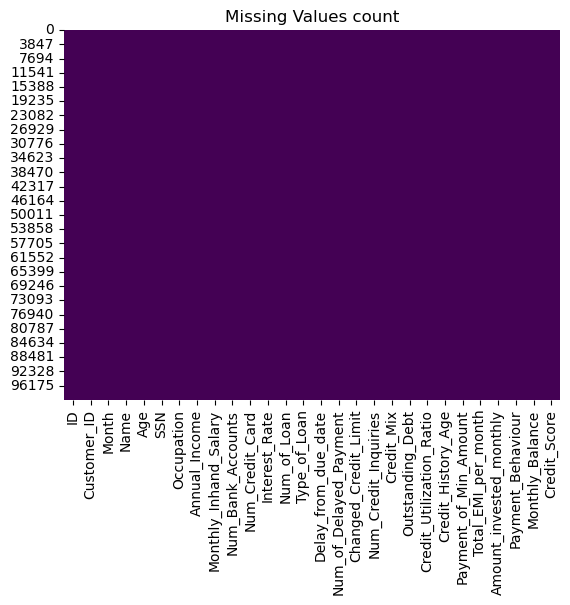

In [8]:
# Visualizing the missing valuesplt.figure(figsize = (15,15))
sns.heatmap(df.isnull(), cbar = False, cmap = "viridis") 
plt.title("Missing Values count")
plt.show()

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
i = 1
for column in df.columns:
    print(f"{i}. {column}") #pretty printing the column names
    i+=1

1. ID
2. Customer_ID
3. Month
4. Name
5. Age
6. SSN
7. Occupation
8. Annual_Income
9. Monthly_Inhand_Salary
10. Num_Bank_Accounts
11. Num_Credit_Card
12. Interest_Rate
13. Num_of_Loan
14. Type_of_Loan
15. Delay_from_due_date
16. Num_of_Delayed_Payment
17. Changed_Credit_Limit
18. Num_Credit_Inquiries
19. Credit_Mix
20. Outstanding_Debt
21. Credit_Utilization_Ratio
22. Credit_History_Age
23. Payment_of_Min_Amount
24. Total_EMI_per_month
25. Amount_invested_monthly
26. Payment_Behaviour
27. Monthly_Balance
28. Credit_Score


In [10]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

#### 1. ID: 
Tracks the Survey Id

#### 2. Customer_ID:
Id of the paisabazaar customers

#### 3. Month:
Number of months in loan tenure.

#### 4. Name:
Name of the customer

#### 5. Age:
Age of the customer 

#### 6. SSN:

#### 7. Occupation:
Occupation of the customer 

#### 8. Annual_Income:
Annual earning of the customer 

#### 9. Monthly_Inhand_Salary:
Mohtnly salary customer is credited with 

#### 10. Num_Bank_Accounts:
Total number of accounts the customer has

#### 11. Num_Credit_Card:
Total number of credit cards the customer possess 

#### 12. Interest_Rate:
THe interest rate of the loan customer has taken

#### 13. Num_of_Loan:
Total number of loan the customer is having 

#### 14. Type_of_Loan:
A loan can be of different type depending on the purpose of the loan, for exapmle: Home loan, personal loan, buisness loan etc.
#### 15. Delay_from_due_date:
How delay the customer makes from the due date. If the customer has to pay EMI on 13th may but was paid on 18th may, the delay would be of 5 days

#### 16. Num_of_Delayed_Payment:
How may delays has the customer made for loan EMIs

#### 17. Changed_Credit_Limit:
Records the change in credit limit of the customer 

#### 18. Num_Credit_Inquiries:
How many inquiries does the customer makes for a new loans

#### 19. Credit_Mix:
Type of credit the customer uses (Good, Standard, Bad) – reflects the variety of credit accounts (credit cards, mortgages, personal loans, etc.).

#### 20. Outstanding_Debt:
The total debt customer has to pay

#### 21. Credit_Utilization_Ratio:
Ratio of credit used to total available credit (important factor in credit score).

#### 22. Credit_History_Age:
Age of credit history, usually in months or years (how long customer has maintained credit accounts).

#### 23. Payment_of_Min_Amount:
Whether the customer pays only the minimum due amount on credit card/loan (Yes/No or categorical).

#### 24. Total_EMI_per_month:
How much of total EMI does the customer pays, For example if a customer has 4 loans with EMIs RS.1400, Rs.3600, Rs.1300, Rs.5000. Total_EMI_per_month = 11300.

#### 25. Amount_invested_monthly:
How much investemnt does the customer does in the market

#### 26. Payment_Behaviour:
This variable reflects patterns of repayment (like “High spend, pays duly” or “Low spend, irregular payment”)

#### 27. Monthly_Balance:
What is the average monthly balance does the customer maintains in thier accounts

#### 28. Credit_Score:
Credit_score scores the customers on thier  behaviour in regard of thier loans, a high credit score indicates the customer maintains it's credit history and time to time payment of EMIs, which makes them more eligible to get new loans and credits.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}:\n{df[col].unique()}\n")

ID:
[  5634   5635   5636 ... 155627 155628 155629]

Customer_ID:
[ 3392  8625 11708 ... 44897 34304 37932]

Month:
[1 2 3 4 5 6 7 8]

Name:
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age:
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]

SSN:
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]

Occupation:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

Annual_Income:
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

Monthly_Inhand_Salary:
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

Num_Bank_Accounts:
[ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]

Num_Credit_Card:
[

## 3. ***Data Wrangling***

### Data Wrangling Code

### *checking data types*

In [12]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### *Dropping irrelevant columns*

In [13]:
# for data analysis some columns seem irrelevent so it's better we drop them. 
# droping columns:
#ID
#Name
#Customer_ID
#SSN
df.columns
df = df.drop(columns = ["ID", "Customer_ID","Name","SSN"])

### *Encode categorical Variables*/

In [14]:
df["Credit_Score"] = df["Credit_Score"].map({"Poor":0, "Standard":1, "Good":2})
df["Credit_Mix"] = df["Credit_Mix"].map({"Bad":0, "Standard":1, "Good":2})

### *Wrangling Payment_of_Min_Amount*

##### Step 1: Encode Yes/No

In [15]:
dummy_df = df.copy()#creates a dummy copy of df 
dummy_df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map({"No": 0, "Yes": 1})
dummy_df = dummy_df.drop(["Occupation","Type_of_Loan","Payment_Behaviour"], axis = 1)#removed object type columns

##### Step 2. Split data

In [16]:
train_data = dummy_df[dummy_df["Payment_of_Min_Amount"].notna()] #all columns with values(0,1)
predict_data = dummy_df[dummy_df["Payment_of_Min_Amount"].isna()] #all columns with na values

##### Step 3. Train a classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

X = train_data.drop(["Payment_of_Min_Amount"], axis=1)
y = train_data["Payment_of_Min_Amount"]

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
 

RandomForestClassifier(random_state=42)

##### Step 4. Predict “NM”

In [18]:
X_pred = predict_data.drop(["Payment_of_Min_Amount"], axis=1)
predictions = clf.predict(X_pred)

In [19]:
### *Adding predictions to df*

In [20]:
df["Payment_of_Min_Amount_Imputed"] = df["Payment_of_Min_Amount"].map({"Yes":1, "No" : 0}) #adding encoded "Payment_of_Min_Amount" in new column "Payment_of_Min_Amount_Imputed"
df .loc[df["Payment_of_Min_Amount"].eq("NM"),"Payment_of_Min_Amount_Imputed"] = predictions #filling "NM" values with predicted results

In [21]:
df["Payment_of_Min_Amount_Imputed"].value_counts()

Payment_of_Min_Amount_Imputed
1.0    59474
0.0    40526
Name: count, dtype: int64

### What all manipulations have you done and insights you found?

#### Manipulations Done:


1. Checked Data Types

2. Verified the data types of all columns to identify categorical and numerical variables.

3. Dropped Irrelevant Columns

4. Removed columns like ID, Customer_ID, Name, and SSN since they don’t contribute meaningful information for analysis or     modeling.

5. Encoded Categorical Variables

6. Converted categorical fields into numerical format for machine learning:

7. Credit_Score: Mapped "Poor" → 0, "Standard" → 1, "Good" → 2.

8. Credit_Mix: Mapped "Bad" → 0, "Standard" → 1, "Good" → 2.

8. Wrangled Payment_of_Min_Amount Column

       1. Original values: ["Yes", "No", "NM"].
       2. Converted "Yes" → 1 and "No" → 0.
       3. Treated "NM" (Not Mentioned) as missing values.
       4. Split data into training and prediction sets:
       5. Training data contained rows with 0 or 1.
       6. Prediction data contained rows with "NM".
       7. Trained a Random Forest Classifier on the training set.
       8. Predicted values for "NM" and imputed them into a new column Payment_of_Min_Amount_Imputed.


#### Insights Found:

1. Irrelevant Columns Dropped: Simplified the dataset and reduced noise by removing identifiers.

2. Categorical Encoding: Transformed non-numeric features into numeric form, making the dataset model-ready.

3. Payment_of_Min_Amount Handling:
    1. Instead of ignoring "NM", machine learning was used to intelligently impute missing values.    
    2. This helps preserve more data and reduces bias compared to simply dropping rows.
    3. Overall Dataset Quality: After wrangling, the dataset has no null values and is clean for further analysis onmodel         training

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Distribution of Credit Score

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\1275327896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="viridis")


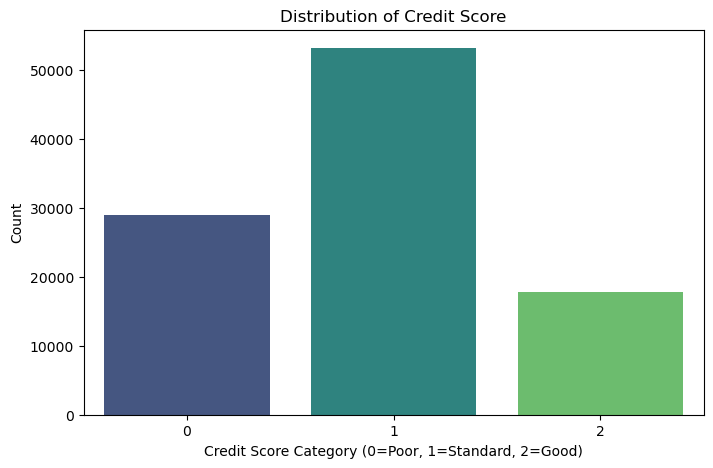

In [22]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.countplot(x="Credit_Score", data=df, palette="viridis")
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score Category (0=Poor, 1=Standard, 2=Good)")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A countplot (bar chart) was chosen because the Credit_Score variable is categorical (0 = Poor, 1 = Standard, 2 = Good). A countplot is the most effective way to show how many customers fall into each credit score category, making it easy to compare the relative frequency of different groups.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of customers belong to the Standard credit score category.

2. A significant proportion of customers fall into the Poor credit score category.

3. The Good credit score category has the lowest representation among customers.
   This distribution indicates that while many customers maintain an average financial standing, a smaller segment is        highly creditworthy, and a notable portion is financially risky.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Business Impact:
1. Customers with Standard and Good credit scores can be targeted with premium services, credit products, or loyalty benefits to increase retention and revenue.
2. Identifying the Poor credit score segment helps the business design stricter risk management strategies, preventing potential defaults.

##### Negative Growth Indicator:
1. A relatively large share of customers with Poor credit scores may indicate higher default risks and financial instability. If not managed, this could lead to negative growth in profitability.

##### Conclusion: 
1. The insights are crucial for risk management, customer targeting, and designing tailored financial products, making this chart highly valuable for business decision-making.

#### Chart 2: Annual Income Distribution

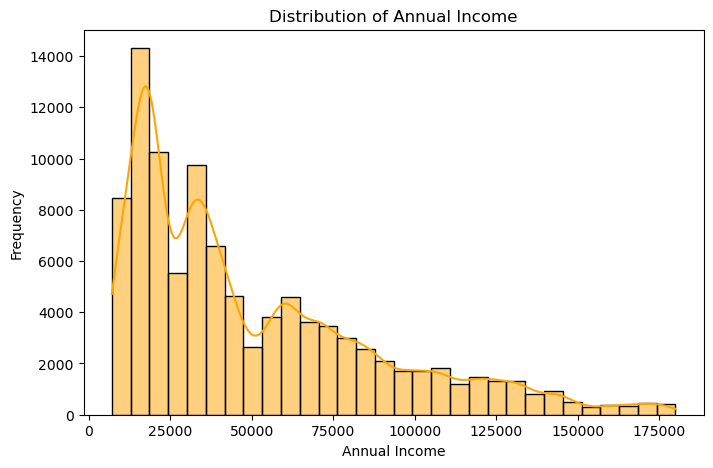

In [23]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df["Annual_Income"], bins=30, kde=True, color="orange")
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show() 

##### 1. Why did you pick the specific chart?

A histogram with KDE (Kernel Density Estimate) was chosen because Annual_Income is a continuous numerical variable. The histogram effectively shows the income distribution across different ranges, while KDE smoothens the curve, helping to visualize the overall pattern and skewness.

##### 2. What is/are the insight(s) found from the chart?

1. Most customers have annual incomes clustered between ₹10,000 and ₹50,000, showing a strong concentration in lower income ranges.

2. A long right tail (positive skewness) indicates that there are fewer customers with very high incomes.

3. A smaller portion of customers earn above ₹100,000 annually, representing the high-income segment

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. Businesses can design tiered products/services aligned with income groups, such as affordable products for low-income customers and premium offers for high-income groups.

##### Negative Indicator:

1. Heavy dependence on lower-income customers may limit profit margins and reduce long-term financial stability if not balanced by high-income customers.

##### Conclusion: The insights enable income-based segmentation, guiding better product design and pricing strategies.

#### Chart 3: Distribution of Age

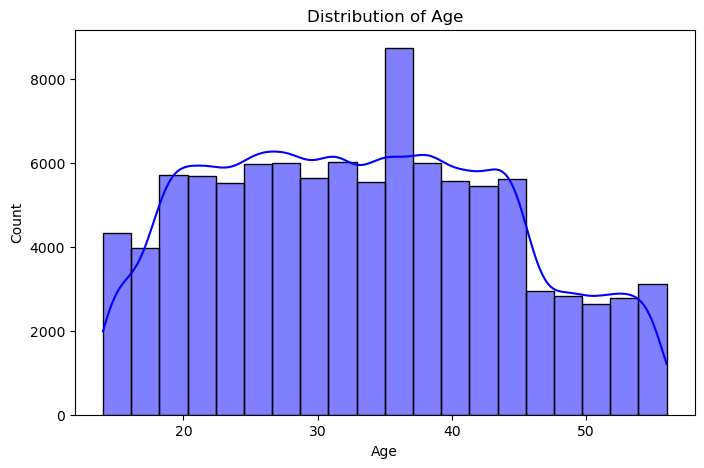

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with KDE is the most suitable visualization for Age, as it shows the frequency distribution across age ranges while highlighting the density pattern. It helps detect the most common age groups and overall age spread in the customer base.

##### 2. What is/are the insight(s) found from the chart?

1. Customers are spread across ages 18 to 55 years, with higher concentrations in the 20–40 years range.

2. The age distribution is fairly uniform, but a clear peak is observed around 35 years old.

3. Very few customers are above 50 years, indicating a younger customer demographic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. Since most customers are young (20–40), businesses can design digitally oriented products and campaigns to appeal to this tech-savvy, working-age group.

2. Younger customers are more likely to engage in long-term services, building customer lifetime value.

##### Negative Indicator:

3. A relatively low older-age customer base could mean the business is missing out on financially stable, older customers who might prefer premium services.

##### Conclusion: 
1. The age insights guide customer profiling and marketing strategies, ensuring better alignment of products with the core demographic group.

#### Chart 4: Payment Behaviour Distribution

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\3677069657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Payment_Behaviour", data=df, palette="Set2")


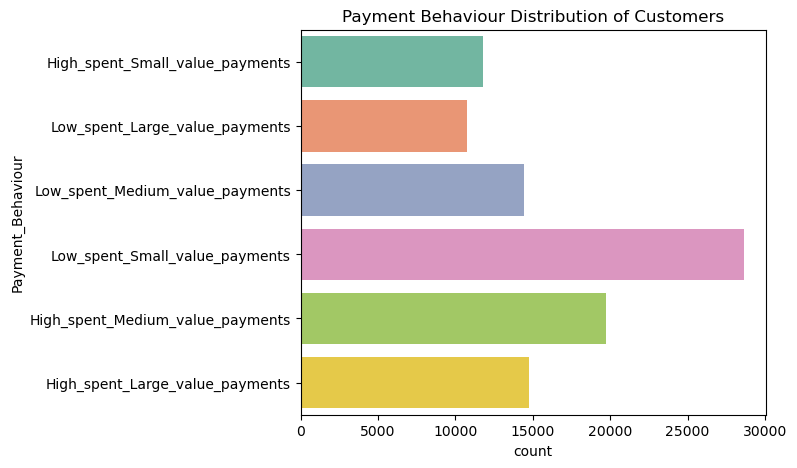

In [25]:
# Chart - 4 visualization code

plt.figure(figsize=(6,5))
sns.countplot(y="Payment_Behaviour", data=df, palette="Set2")
plt.title("Payment Behaviour Distribution of Customers")
plt.show()


##### 1. Why did you pick the specific chart?

A countplot (horizontal bar chart) was chosen because Payment_Behaviour is a categorical variable with multiple categories (e.g., High_spent_Small_value_payments, Low_spent_Large_value_payments). A bar chart is the most effective visualization for comparing frequencies across different categorical payment behaviors. The horizontal layout improves readability for longer category names.

##### 2. What is/are the insight(s) found from the chart?

1. The highest customer group falls under Low_spent_Small_value_payments, indicating a majority of customers spend less but make frequent small-value purchases.

2. High_spent_Medium_value_payments and High_spent_Large_value_payments have a notable share, representing premium customers who could be highly profitable.

3. High_spent_Small_value_payments and Low_spent_Large_value_payments are relatively low, showing fewer customers in those segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. The business can design differentiated strategies:
2. Offer loyalty rewards or subscription models for Low_spent_Small_value customers to increase retention.
3. Target High_spent customers with premium services, exclusive benefits, and personalized offers.
4. Identifying high-value payment behavior allows the business to prioritize customer segments with maximum                  profitability potential.

##### Negative Indicator:

1. Heavy reliance on low-spent small-value customers could pose a challenge, as they contribute less revenue per             transaction.
2. If these customers dominate the customer base, growth may plateau unless cross-selling or up-selling strategies           are applied.

##### Conclusion: 
1. This chart provides actionable insights for customer segmentation, product bundling, and marketing strategies. It highlights the importance of nurturing both high-value and frequent small-value customer groups to maintain balanced growth

#### Chart 5: Occupation Distribution

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\4169576288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=df, palette="husl")


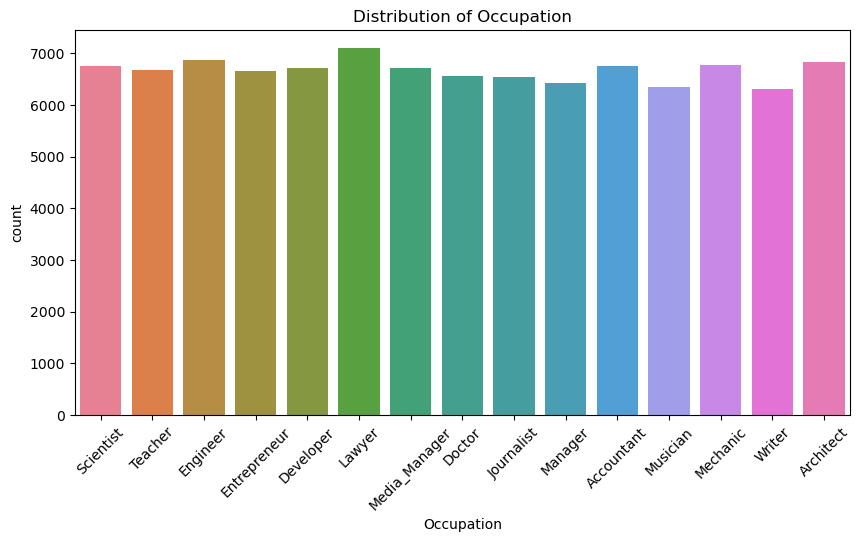

In [26]:

plt.figure(figsize=(10,5))
sns.countplot(x="Occupation", data=df, palette="husl")
plt.xticks(rotation=45)
plt.title("Distribution of Occupation")
plt.show()




##### 1. Why did you pick the specific chart?

A countplot (bar chart) was chosen because Occupation is a categorical variable with multiple professional categories (e.g., Scientist, Teacher, Engineer, Lawyer). A bar chart is the most effective visualization to compare the frequency distribution of customers across these occupations.

The chart highlights which occupations dominate the dataset and whether the distribution is balanced or skewed toward specific professions.

##### 2. What is/are the insight(s) found from the chart?

1. The distribution of occupations is fairly balanced, with each occupation having customer counts between 6,300 – 7,200.

2. The highest number of customers belong to the "Lawyer" profession, slightly more than other categories.

3. Occupations such as Mechanic and Writer appear at the lower end of the distribution but are not drastically different.

4. No single profession dominates disproportionately, indicating the dataset covers a wide variety of professional backgrounds fairly equally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. A balanced distribution of occupations ensures that the dataset is representative and reliable for customer               segmentation studies.  
2. Businesses can customize marketing strategies for different occupational groups (e.g., premium financial services         for Lawyers/Doctors, flexible packages for Freelancers/Artists).

3. Since no group is overwhelmingly dominant, the business has opportunities to tap into multiple diverse customer           segments.

##### Negative Indicator:

1. Since differences across occupations are not very large, occupation alone may not be the strongest predictor of           customer behavior.
2. Relying only on occupation-based segmentation could result in less differentiated strategies, as spending habits          may not vary drastically across these categories.

##### Conclusion:
This chart highlights that the customer base is well-distributed across various occupations, offering a balanced dataset for further segmentation. While useful for profiling, deeper behavioral or demographic features may provide sharper insights for targeted marketing.

### Bivariate Analysis (6 Charts)

#### Chart 6: Credit Score vs Annual Income (Boxplot)

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\1260880942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="coolwarm")


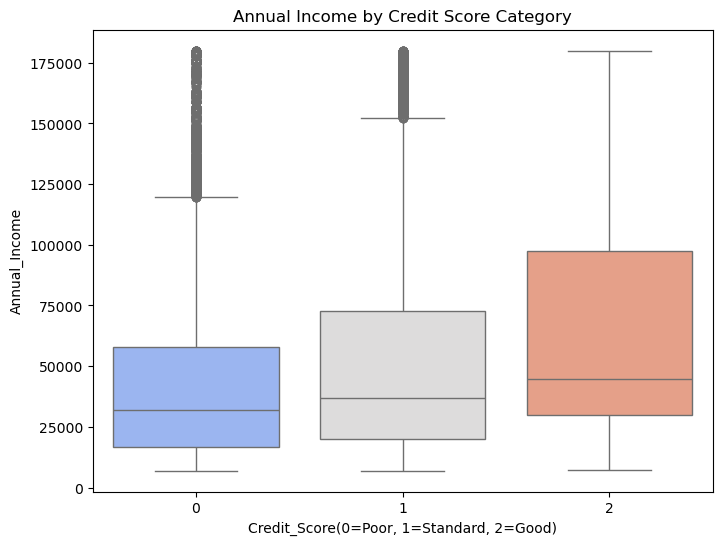

In [27]:
# Chart - 6 visualization code

plt.figure(figsize=(8,6))
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="coolwarm")
plt.title("Annual Income by Credit Score Category")
plt.xlabel("Credit_Score(0=Poor, 1=Standard, 2=Good)")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was chosen because it is highly effective for comparing the distribution of a continuous variable (Annual_Income) across different categorical groups (Credit_Score: 0 = Poor, 1 = Standard, 2 = Good). Boxplots clearly show the median, spread, and presence of outliers, which makes them suitable for analyzing financial data like income.

##### 2. What is/are the insight(s) found from the chart?

1. Customers with Good credit scores (2) generally have higher median annual incomes compared to those with Standard (1) and Poor (0) scores.

2. The spread of income increases as the credit score improves, meaning higher credit score groups contain both moderately high and extremely high-income customers.

3. Many outliers exist across all categories, especially in Poor and Standard groups, showing that some customers with low credit scores still earn very high incomes but may not manage credit well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. These insights highlight that income level and creditworthiness are correlated but not perfectly aligned.
2. Businesses can use this to design customized financial products:
3. High-income but Poor credit → Offer financial literacy or secured products.
4. Good credit and high-income → Provide premium loans, investment, and credit card options.
5. The spread shows opportunities for segmentation within each credit category.

##### Negative Indicator:

1. The existence of high-income customers with Poor credit scores indicates mismanagement of credit behavior. If             ignored, this could lead to default risks even among wealthier customers.

##### Conclusion:
This analysis helps balance risk vs. reward strategies by aligning credit policies with customer income, allowing for smarter lending and targeted financial solutions.

#### Chart 7: Age vs Annual Income (Scatterplot)

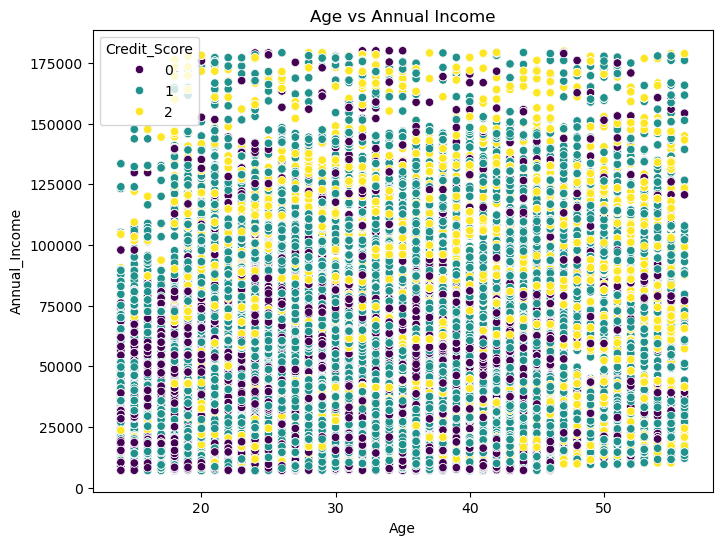

In [28]:
# Chart - 7 visualization code

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Annual_Income", data=df, hue="Credit_Score", palette="viridis")
plt.title("Age vs Annual Income")
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot was chosen because it helps show the relationship between two continuous variables (Age and Annual Income), while also adding a third dimension using Credit_Score as color coding.

##### 2. What is/are the insight(s) found from the chart?

1. Income increases gradually with age but is spread widely at all ages.
2. Customers with all three credit score categories (Poor, Standard, Good) are distributed across different age and income levels.
3. Higher income levels are present across all age groups, meaning age alone is not a strong predictor of income.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact: 
Businesses can understand that income opportunities exist across all age groups, so targeting only young or older customers may miss potential segments.

##### Negative Indicator:
Since income is not strongly linked to age, relying solely on age-based segmentation could lead to inefficient targeting strategies.

##### Conclusion: 
The chart shows that age and income have weak correlation, and combining age with other features (like credit score or spending behavior) will give better segmentation for business decisions.

#### Chart 8: Credit Score vs Occupation (Countplot)

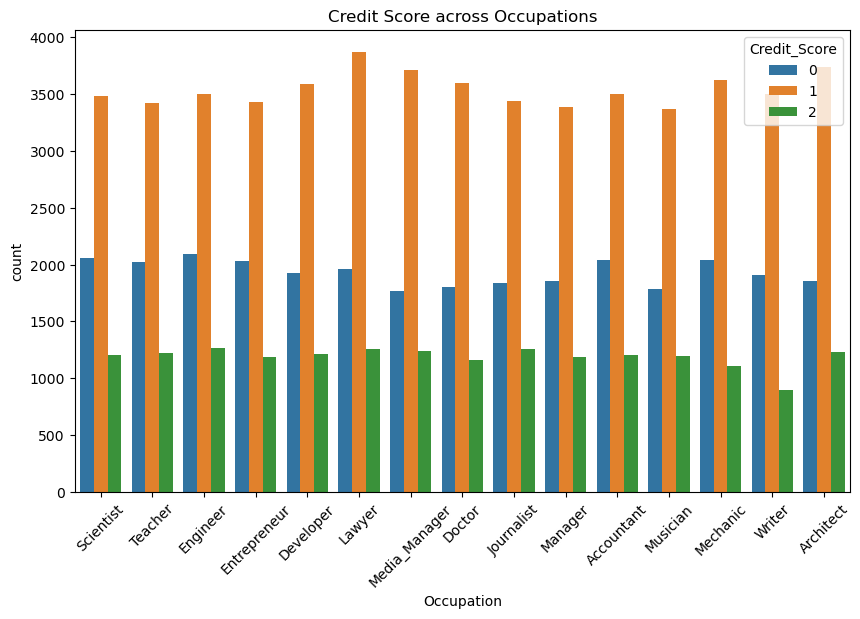

In [29]:
# Chart - 8 visualization code

plt.figure(figsize=(10,6))
sns.countplot(x="Occupation", hue="Credit_Score", data=df, palette="tab10")
plt.xticks(rotation=45)
plt.title("Credit Score across Occupations")
plt.show()


##### 1. Why did you pick the specific chart?

To compare how credit scores vary across different occupations.

##### 2. What is/are the insight(s) found from the chart?

Most occupations have a majority in the medium credit score range. Few fall into low or high categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps target financial products by profession. Risk of loss is lower if focusing on occupations with stronger medium/high credit score groups.

#### Chart 9: Gender vs Credit Score

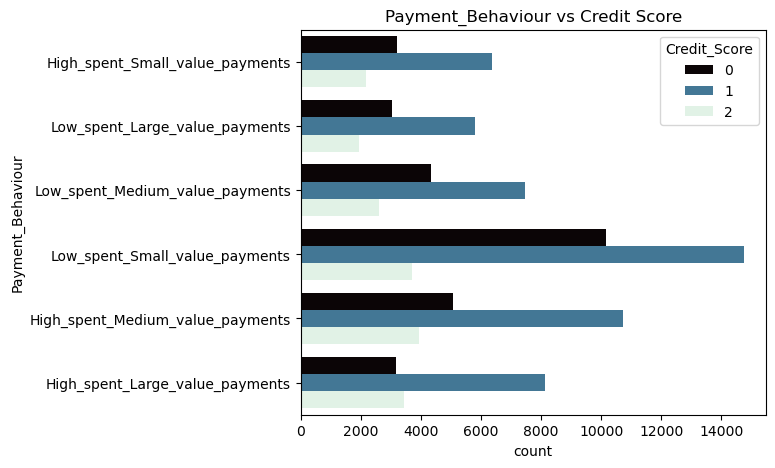

In [30]:
# Chart - 9 visualization code


plt.figure(figsize=(6,5))
sns.countplot(y="Payment_Behaviour", hue="Credit_Score", data=df, palette="mako")
plt.title("Payment_Behaviour vs Credit Score")
plt.show()



##### 1. Why did you pick the specific chart?

To see how different payment behaviors relate to credit scores.

##### 2. What is/are the insight(s) found from the chart?

1. People with low spending & small value payments are the largest group and mostly fall into the medium credit score range.
2. High spending with large value payments shows fewer people, but many have medium scores.
3. Low credit scores are more common in inconsistent payment behaviors.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Business Impact:
This helps identify reliable vs risky payers. Companies can reward medium/high score groups with offers while being cautious with low score behaviors.

#### Chart 10: Occupation vs Annual Income (Boxplot)

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\2071982213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Occupation", y="Annual_Income", data=df, palette="plasma")


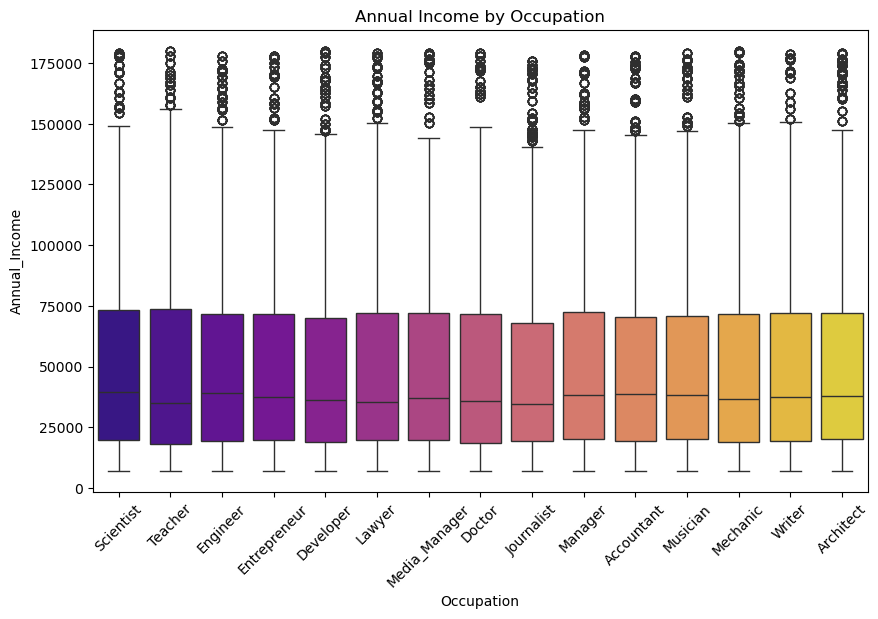

In [31]:
# Chart - 10 visualization code

plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="Annual_Income", data=df, palette="plasma")
plt.xticks(rotation=45)
plt.title("Annual Income by Occupation")
plt.show()




##### 1. Why did you pick the specific chart?

Boxplot is best to compare income distributions across occupations.

##### 2. What is/are the insight(s) found from the chart?

1. Lawyers, Doctors, Managers, Scientists show higher median incomes.
2. Musicians, Mechanics, Writers earn comparatively less.
3. Many outliers indicate a few very high earners in each field.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Business Impact:

Helps segment customers by income → target premium vs. budget products.
Over-focus on high earners may ignore a large middle/lower-income base.

#### Chart 11: Age vs Credit Score

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\1865688834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Age", data=df, palette="cubehelix")


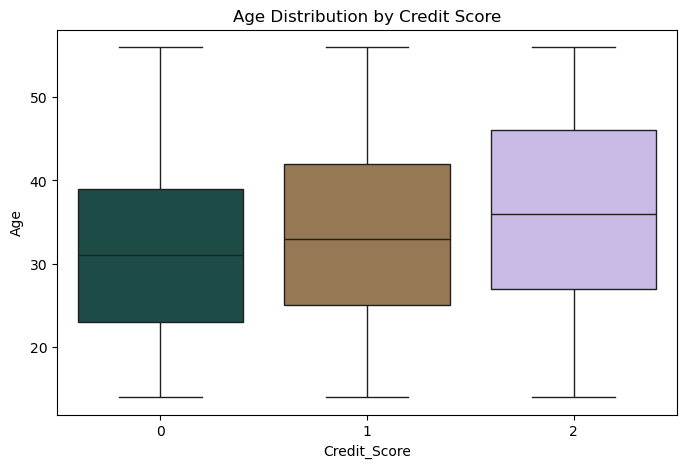

In [32]:
# Chart - 11 visualization code
plt.figure(figsize=(8,5))
sns.boxplot(x="Credit_Score", y="Age", data=df, palette="cubehelix")
plt.title("Age Distribution by Credit Score")
plt.show()



##### 1. Why did you pick the specific chart?

Boxplot highlights how age varies across credit score groups.

##### 2. What is/are the insight(s) found from the chart?

1. Younger customers dominate lower credit scores.
2. Higher credit scores skew slightly toward older ages.
3. Middle-aged group has widest spread across all scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Banks can design age-specific financial products (e.g., loans for young, investments for older).
Risk of ignoring young customers with low scores, who may be future high-value clients.

#### Chart 12: Num_of_Loans vs Credit Score

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9112\911296349.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="Num_of_Loan", y="Credit_Score", data=df, ci=None, markers="o", linestyles="-")


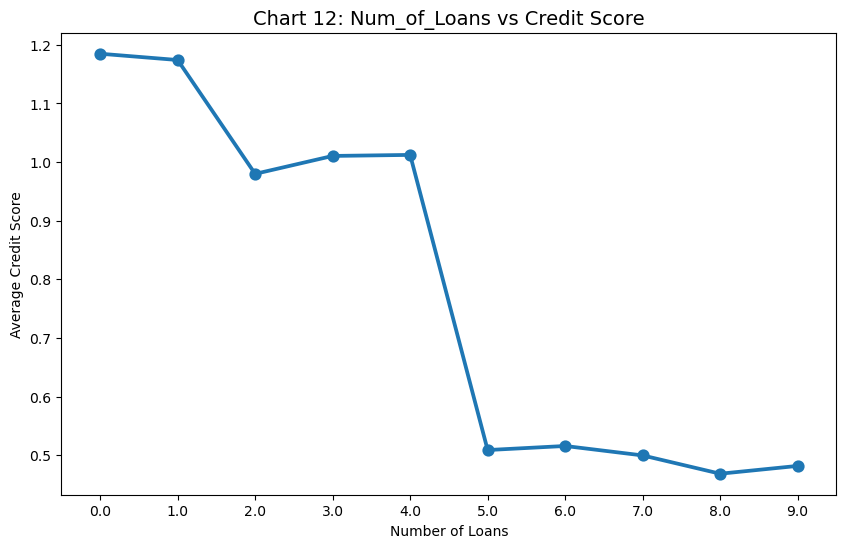

In [33]:
# Chart - 12 visualization code
plt.figure(figsize=(10,6))
sns.pointplot(x="Num_of_Loan", y="Credit_Score", data=df, ci=None, markers="o", linestyles="-")
plt.title("Chart 12: Num_of_Loans vs Credit Score", fontsize=14)
plt.xlabel("Number of Loans")
plt.ylabel("Average Credit Score")
plt.show()



##### 1. Why did you pick the specific chart?

I used a line chart because it clearly shows the trend between the number of loans and the average credit score. It helps visualize how credit scores change as the number of loans increases.

##### 2. What is/are the insight(s) found from the chart?

1. Customers with fewer loans (0–2 loans) tend to have a higher average credit score (around 1.0+).
2. As the number of loans increases beyond 4, the average credit score drops sharply (close to 0.5 or below).
3. This suggests that taking more loans negatively impacts credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Impact:

1. The bank can identify high-risk customers (those with many loans and low credit scores) and adjust lending policies.

2. Can offer financial literacy programs or restructuring plans for customers with multiple loans to prevent default.

##### Negative Growth Risk:

1. If too many customers take on multiple loans, it may increase default risk and hurt the bank’s portfolio.

2. The insight shows that increasing loans does not lead to healthier credit behavior, which could reduce profitability if not managed carefully.

### Multivariate Analysis (4 Charts)

#### Chart 13: Age vs Income vs Credit Score (Scatter 3-variable)

D:\Workspace\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


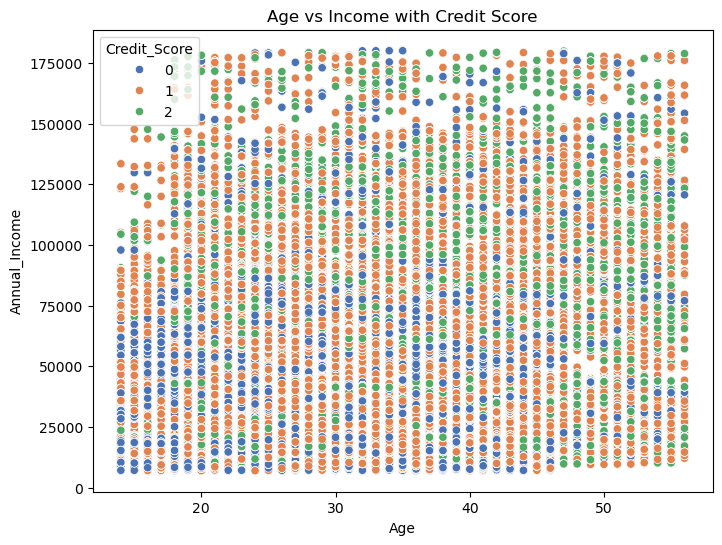

In [34]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Annual_Income", hue="Credit_Score",data=df, palette="deep")
plt.title("Age vs Income with Credit Score")
plt.show()




##### 1. Why did you pick the specific chart?

To analyze how age and income together impact credit scores.

##### 2. What is/are the insight(s) found from the chart?

1. Higher incomes appear across all age groups, but credit scores are spread out.
2. Younger people (20s) mostly fall into medium and low credit scores.
3. Middle-aged individuals (30s–40s) show a stronger mix of medium/high credit scores.
4. High income doesn’t always mean a high credit score — behavior still matters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Business Impact:
This helps businesses design credit/loan products by balancing risk. Younger low-score groups need more financial guidance, while stable middle-aged groups with better credit can be targeted for premium offers.

#### Chart 14: Occupation vs Credit Score vs Age

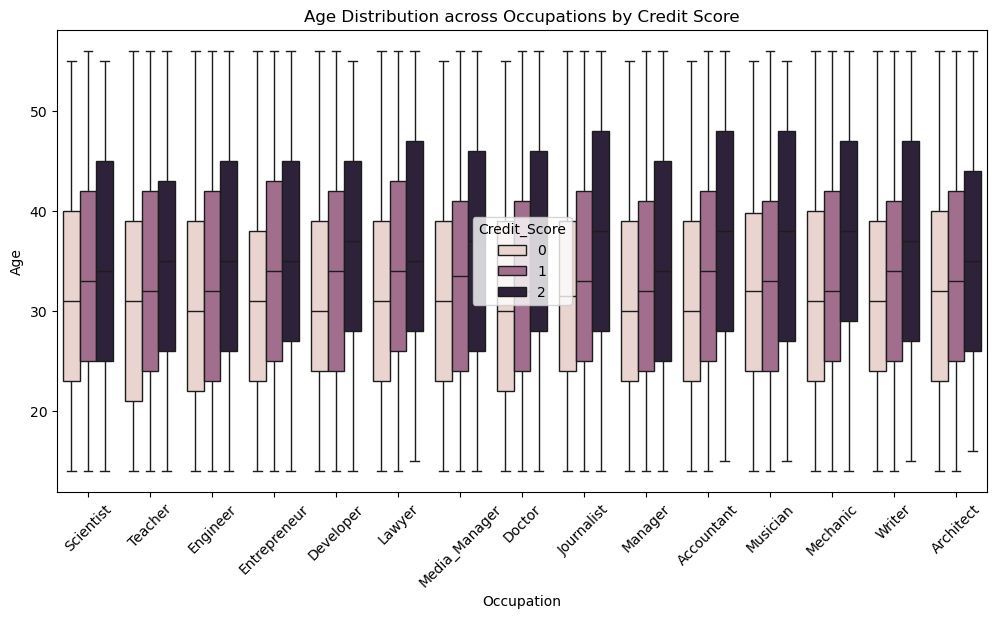

In [35]:
# Chart - 13 visualization code
plt.figure(figsize=(12,6))
sns.boxplot(x="Occupation", y="Age", hue="Credit_Score", data=df)
plt.xticks(rotation=45)
plt.title("Age Distribution across Occupations by Credit Score")
plt.show()




##### 1. Why did you pick the specific chart?

It combines demographics (Age, Occupation) with financial outcome (Credit Score).

##### 2. What is/are the insight(s) found from the chart?

1. Some occupations show higher Credit Scores at younger ages.
2. Certain jobs might cluster with poor Credit Scores despite age.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive:
Banks can identify risky occupations + age groups to adjust loan approval criteria.

##### Negative:
Over-restricting credit to certain jobs could reduce customer acquisition.

#### Chart 15: Age vs Credit Utilization by Payment Behaviour

D:\Workspace\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


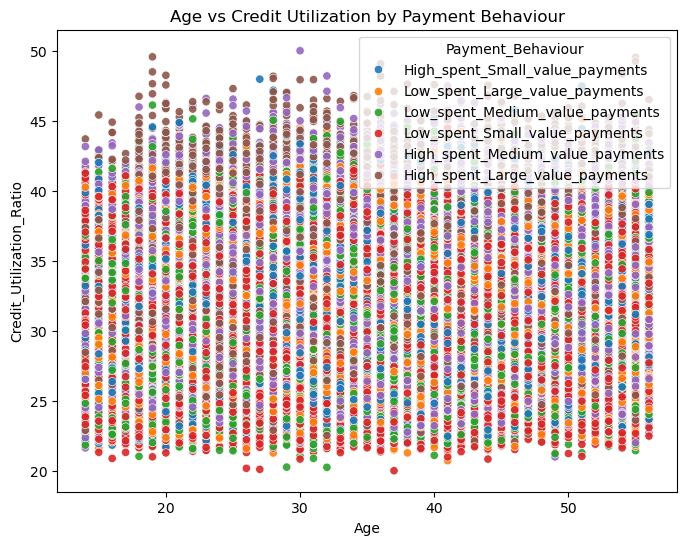

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Credit_Utilization_Ratio", 
    hue="Payment_Behaviour",  
    data=df, 
    alpha=0.9
)
plt.title("Age vs Credit Utilization by Payment Behaviour")
plt.show()


##### 1. Why did you pick the specific chart?

To check how different payment behaviors influence credit utilization across age groups.

##### 2. What is/are the insight(s) found from the chart?

1. Younger people (<30) often show high utilization with both high and low spending patterns.

2. Middle-aged groups (30–45) have more balanced utilization ratios across different payment behaviors.

3. Large value payment users (both high & low spenders) spread across ages but still maintain high utilization ratios.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Business Impact:
Helps financial institutions spot risky groups (young + high utilization) and reward stable groups (mid-age + consistent payments). This can improve credit risk management and customer targeting.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. H₀: High credit scores are independent of being older & high-income.
2. H₁: Older individuals who earn good money tend to have high credit scores.

#### Chi-Square on a 2×2 segment (simple, transparent)

1. Older = Age ≥ 40 (you can change the cutoff)
2. High income = top 25% income (≥ 75th percentile)
3. High credit = Credit_Score == 2

In [37]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

#create flags
older = df["Age"] >= 40
high_income_cut = df["Annual_Income"].quantile(0.75)
high_income = df["Annual_Income"] >= high_income_cut
high_credit = df["Credit_Score"] == 2

#define the target segment: Older & High Income
segment = older & high_income

#contigency table: segment vs high credit score
ct = pd.crosstab(segment, high_credit)

chi2, p, dof, exp = chi2_contingency(ct)
print(f"\nChi-square={chi2:.3f}, dof={dof}, p-value={p:.5f}")
n = ct.to_numpy().sum()


Chi-square=1396.002, dof=1, p-value=0.00000


In [38]:
phi2 = chi2/n
cramers_v = (phi2)**0.5
print("Cramer's V:", cramers_v)



Cramer's V: 0.11815254555974829


In [39]:
# Practical lift
prop_segment = ct.loc[True,True]/ct.loc[True].sum()
prop_others = ct.loc[False,True]/ct.loc[False].sum()
print("High-credit rate (segment):", prop_segment)
print("High-credit rate (others) :", prop_others)
print("Lift:", prop_segment/prop_others)

High-credit rate (segment): 0.32156646442360726
High-credit rate (others) : 0.1639962610655963
Lift: 1.9608158279595471


1. High-credit rate (segment): 0.3215 (~32.2%)
➡ About 32% of older high earners in your dataset have a high credit score.
2. High-credit rate (others): 0.1640 (~16.4%)
➡ Among everyone else (not older high earners), only ~16% have a high credit score.
3. Lift: 1.96 (~2x)
➡ This means the probability of having a high credit score is almost double in the target segment compared to others.

#### Hypothesis: “Older high earners tend to have good credit scores.”

The result confirms that → people in this group are ~2 times more likely to have good credit scores than the rest of the population.
Statistically: Chi-square told us the association is real (not random).
Practically: This lift tells us it’s meaningful and strong enough to use in decision-making.

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test

##### Why did you choose the specific statistical test?

Chi-Squared Test was chosen because we had our segment variable(Age, Income, credit score) as categorical:
1. Age (old vs. not old) → categorical (after binning into old/not old).
2. Income (high vs. not high) → categorical (after binning into high/not high).
3. Credit Score (high vs. not high) → categorical.
To find the relationship between ("Age", "Income") & ("Credit score") we used chi-Squared

###### Chi-Squared Test answers:
1. If the observed distribution (counts in the contingency table) is significantly different from what would be expected if they were independent.

2. In plain terms: "Is the segment’s higher rate of good credit just random, or is it a real pattern?"

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. H₀: Occupation does not effect the credit score 
2. H₁: Occupation does effect the credit score

#### Kruskal–Wallis test

In [40]:
#Group credit scores by occupation
groups = [df.loc[df["Occupation"] == occ, "Credit_Score"] for occ in df["Occupation"].unique()]
stat, p = stats.kruskal(*groups)
print("Kruskal-Wallis H-Statistic:", stat)
print("p:",p)

Kruskal-Wallis H-Statistic: 97.54432469275962
p: 1.3991917094418075e-14


##### Which statistical test have you done to obtain P-Value?

Kruskal–Wallis test

##### Why did you choose the specific statistical test?

The independent variable (Occupation) divides the data into multiple groups.

The dependent variable (Credit_Score) is ordinal categorical (0, 1, 2), so we cannot assume normal distribution or equal variance.
Kruskal–Wallis is a non-parametric test suitable for comparing distributions of an ordinal variable across multiple independent groups.
It was chosen instead of Chi-square because the independent variable is not nominal categorical but ordinal with many levels.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. H₀: The number of loans has no significant effect on credit score.
2. H₁: Individuals with a higher number of loans tend to have lower credit scores.

#### 2. Kruskal–Wallis test

In [41]:
#Group credit scores by number of loans
groups = [df.loc[df["Num_of_Loan"] == occ, "Credit_Score"] for occ in df["Num_of_Loan"].unique()]
stat, p = stats.kruskal(*groups)
print("Kruskal-Wallis H-Statistic:", stat)
print("p:",p)


Kruskal-Wallis H-Statistic: 15723.030971290707
p: 0.0


##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis Test

##### Why did you choose the specific statistical test?

The independent variable (Num_of_Loan) divides the data into multiple groups.

The dependent variable (Credit_Score) is ordinal categorical (0, 1, 2), so we cannot assume normal distribution or equal variance.
Kruskal–Wallis is a non-parametric test suitable for comparing distributions of an ordinal variable across multiple independent groups.
It was chosen instead of Chi-square because the independent variable is not nominal categorical but ordinal with many levels.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Month                            0
Age                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Payment_of_Min_Amount_Imputed    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the data set

### 2. Handling Outliers

##### Step 1: Identify numeric features

In [43]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols


Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Payment_of_Min_Amount_Imputed'],
      dtype='object')

##### Step 2: Detect outliers with IQR

In [44]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
for col in numeric_cols:
    n_outliers = detect_outliers(df, col).shape[0]
    print(f"{col}: {n_outliers} outliers")

Month: 0 outliers
Age: 0 outliers
Annual_Income: 2000 outliers
Monthly_Inhand_Salary: 2017 outliers
Num_Bank_Accounts: 0 outliers
Num_Credit_Card: 0 outliers
Interest_Rate: 0 outliers
Num_of_Loan: 0 outliers
Delay_from_due_date: 4002 outliers
Num_of_Delayed_Payment: 0 outliers
Changed_Credit_Limit: 579 outliers
Num_Credit_Inquiries: 787 outliers
Credit_Mix: 0 outliers
Outstanding_Debt: 5272 outliers
Credit_Utilization_Ratio: 4 outliers
Credit_History_Age: 0 outliers
Total_EMI_per_month: 5044 outliers
Amount_invested_monthly: 4464 outliers
Monthly_Balance: 7400 outliers
Credit_Score: 0 outliers
Payment_of_Min_Amount_Imputed: 0 outliers


##### Step 3: Visualize outliers (Boxplots for each numeric feature)

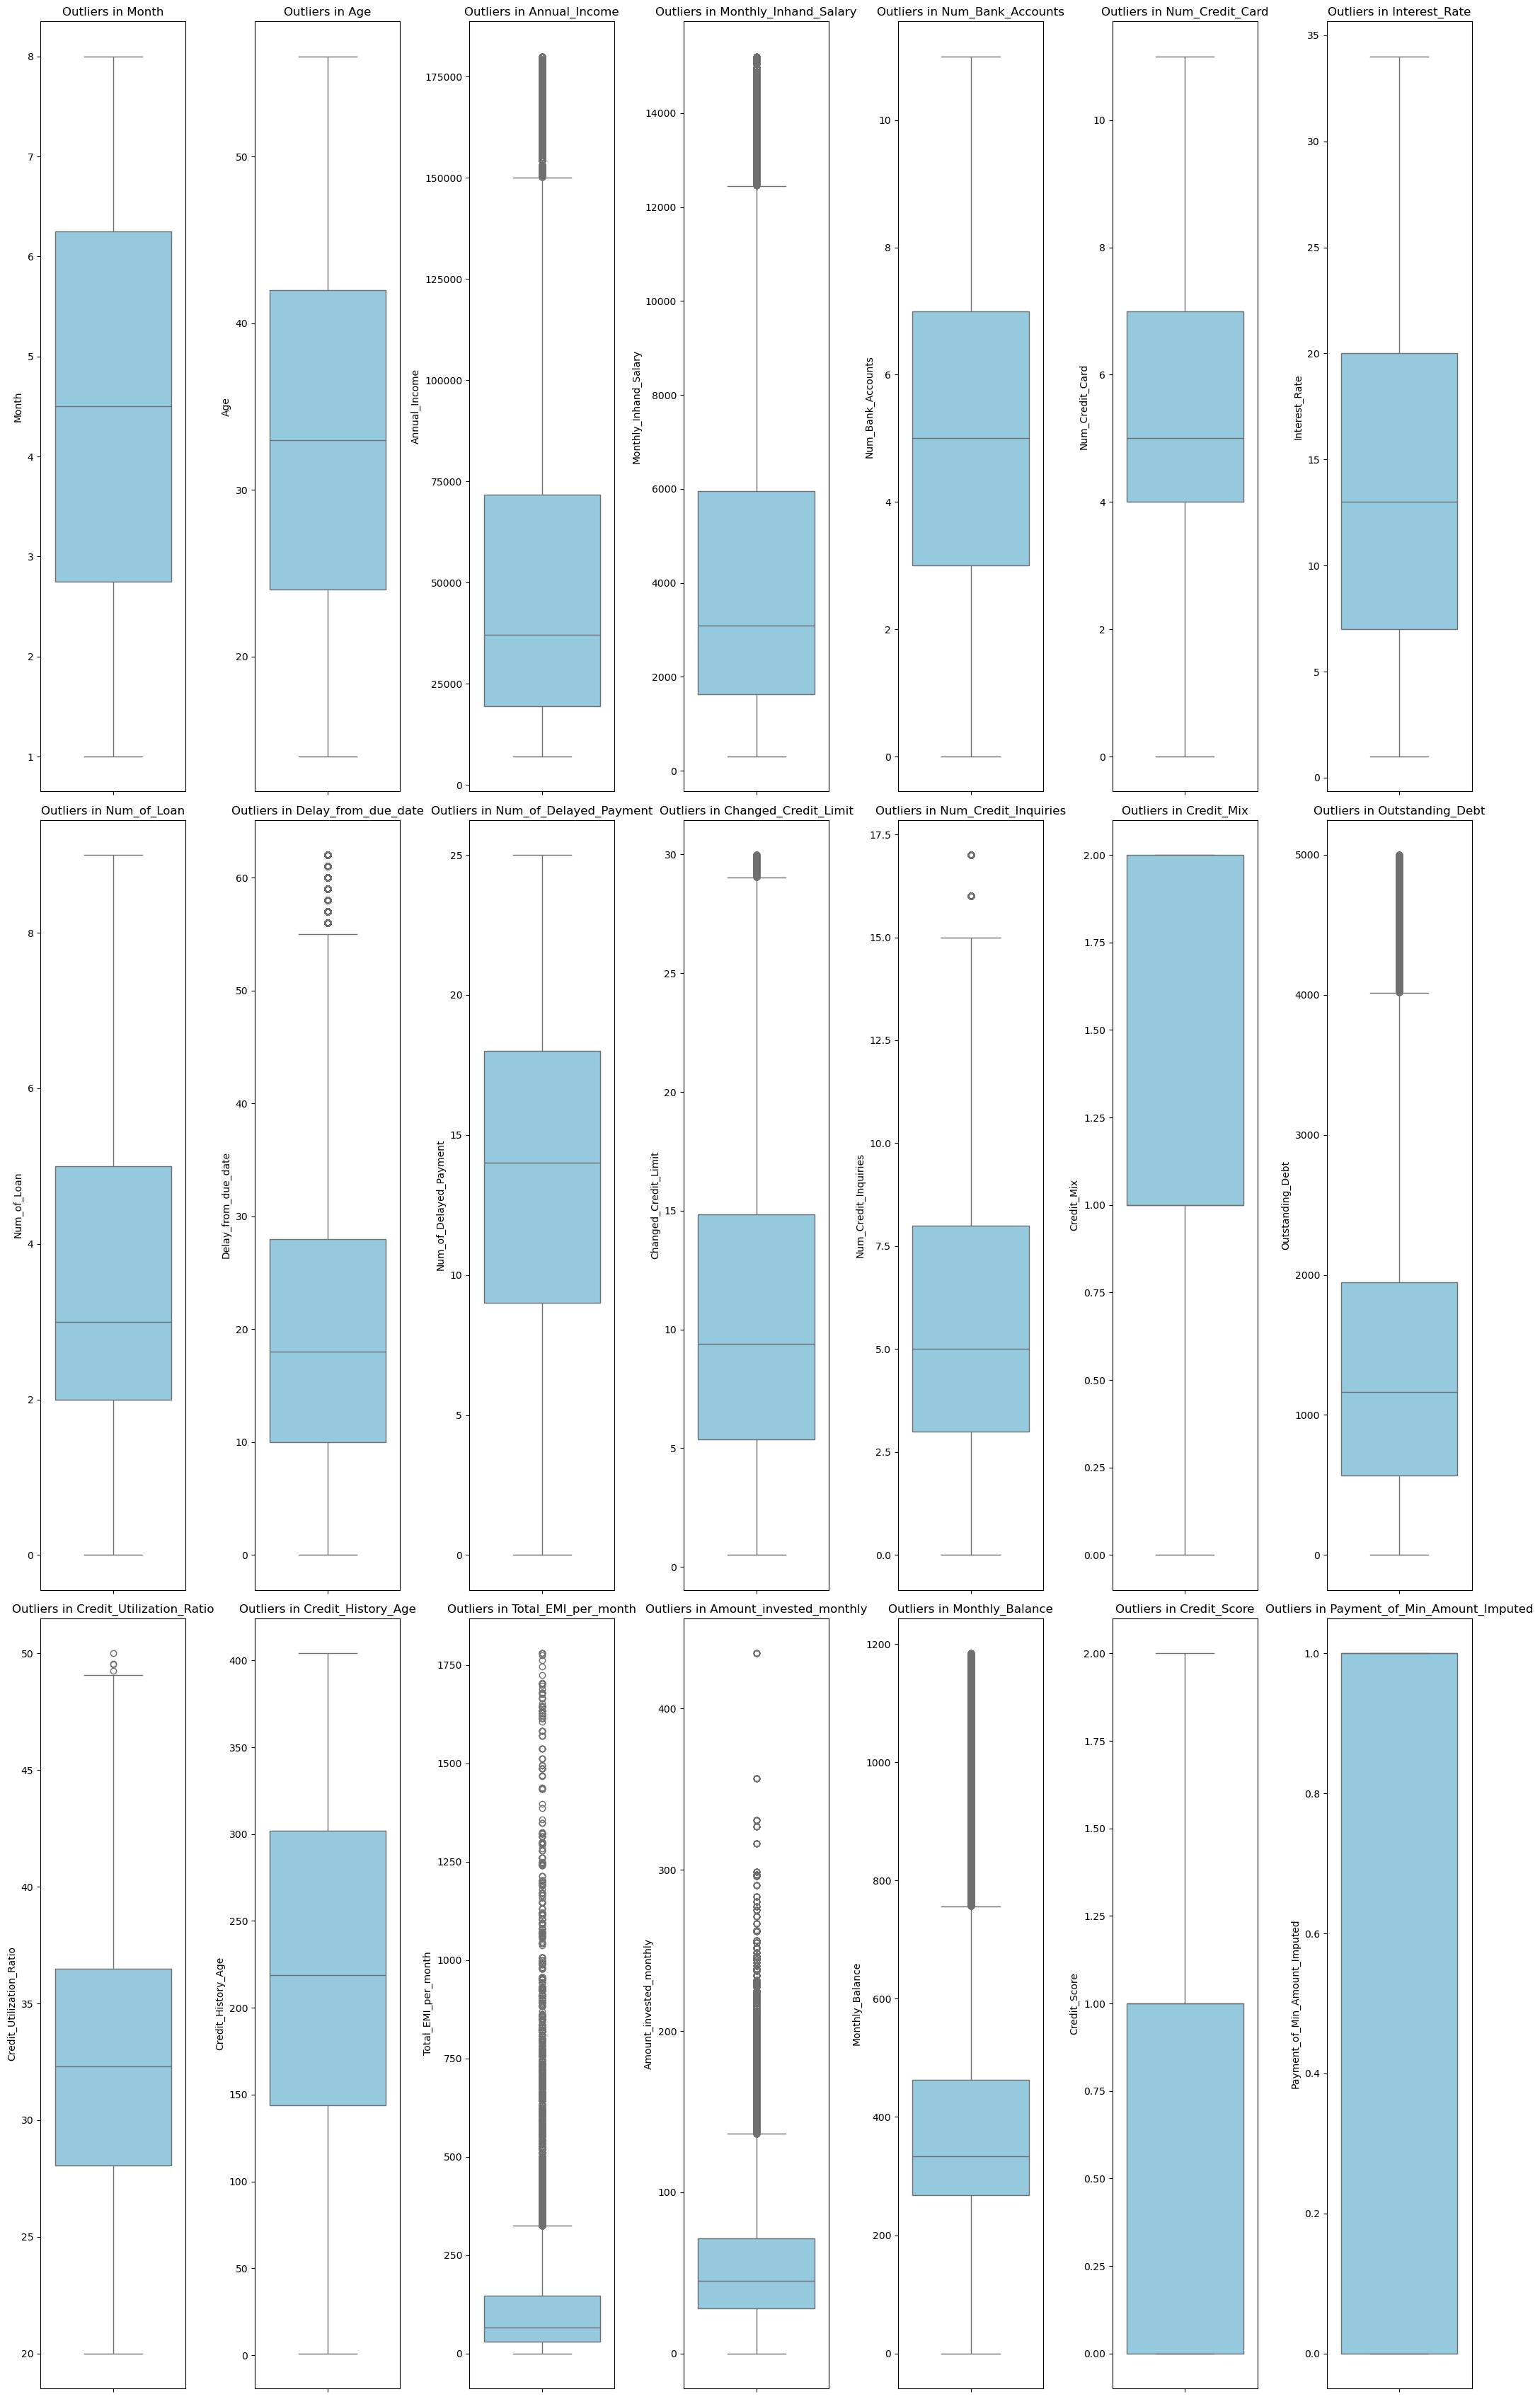

In [45]:
plt.figure(figsize=(21,34))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, (len(numeric_cols)+1)//3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

##### Step 4: Handle outliers

In [46]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)   # value at 25% mark
    Q3 = df[column].quantile(0.75)   # value at 75% mark

    IQR = Q3 - Q1 #InterQuartileRange
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df
    
for col in numeric_cols:
    cap_outliers(df, column)

##### What all outlier treatment techniques have you used and why did you use those techniques?

#### handling outliers: capping technique
Capping = instead of removing them (which loses data), we capped them at a reasonable boundary.

1. If a value is too high → set it equal to the upper bound.
2. If a value is too low → set it equal to the lower bound.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding of following variable were done in data wrangling itself for chart visualisation and hypothesis testing:
1. Credit_Mix (object) --->Credit_Mix (int64) {0,1,2}
2. Credit_Score (object) --->Credit_Score (int64) {0,1,2}
3. Payment_of_Min_Amount(object) ---> Payment_of_Min_Amount_Imputed(int64) {0,1,2}

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [48]:
df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

1. 'Occupation': Occupation is simple and not musch impactful as a textual data so we'll skip this.
2. Since we already have a cleaned encoded version of Payment_of_Min_Amount as Payment_of_Min_Amount_Imputed we'll skip this
3. Payment_Behaviour' is also a categorical string data, so we'll skip this too.

##### Textual Data Preprocessing of 'Type_of_Loan'

In [49]:
# Cthe name of the text column ('Type_of_Loan)
TEXT_COL = 'Type_of_Loan'

#### 1. Expand Contraction

In [50]:
# Expand Contraction
# Expand common English contractions with a local mapping (works offline)
import re

_contractions = {
    "can't": "cannot", "won't": "will not", "don't": "do not",
    "i'm": "i am", "it's": "it is", "you're": "you are",
    "i've": "i have", "we're": "we are", "they're": "they are",
    "isn't": "is not", "didn't": "did not", "doesn't": "does not",
    "n't": " not"
}
_con_re = re.compile("|".join(map(re.escape, _contractions.keys())), flags=re.IGNORECASE)

def expand_contractions_simple(text):
    """Replace contractions with their expanded forms using the local map."""
    if text is None:
        return ""
    s = str(text)
    def _repl(m):
        return _contractions.get(m.group(0).lower(), m.group(0))
    return _con_re.sub(_repl, s)

df[TEXT_COL] = df[TEXT_COL].astype(str).apply(expand_contractions_simple)

#### 2. Lower Casing

In [51]:
# Lower Casing
def to_lower(text):
    if text is None:
        return ""
    return str(text).lower()

df[TEXT_COL] = df[TEXT_COL].apply(to_lower)

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
import string
_punct_re = re.compile(r'[%s]' % re.escape(string.punctuation))

def remove_punctuation(text):
    if text is None:
        return ""
    s = str(text)
    # Replace punctuation characters with a space so words don't concatenate
    s = _punct_re.sub(' ', s)
    return s

df[TEXT_COL] = df[TEXT_COL].apply(remove_punctuation)



#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

_url_re = re.compile(r'http\S+|www\.\S+', flags=re.IGNORECASE)
_digits_word_re = re.compile(r'\w*\d\w*')  # matches any token containing a digit

def remove_urls_and_digit_words(text, remove_digit_words=True):
    if text is None:
        return ""
    s = str(text)
    # Remove URLs
    s = _url_re.sub(' ', s)
    # Optionally remove tokens that contain digits (e.g., 'win100', 'abc123')
    if remove_digit_words:
        s = _digits_word_re.sub(' ', s)
    return s

df[TEXT_COL] = df[TEXT_COL].apply(lambda t: remove_urls_and_digit_words(t, remove_digit_words=True))


#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords & # Remove White spaces

# Lightweight fallback stopword set:
_SIMPLE_STOPWORDS = {"the","a","an","and","is","in","it","of","to","for","on","that","this","with","as","at","by","be","are","from","or"}
_NEGATIONS = {"no","not","nor","never"}

# use NLTK stopwords if available
try:
    from nltk.corpus import stopwords
    _stop = set(stopwords.words('english')) - _NEGATIONS
except Exception:
    _stop = _SIMPLE_STOPWORDS - _NEGATIONS

def remove_stopwords_and_norm_ws(text):
    """Removes common stopwords (preserving negations) and collapses whitespace."""
    if text is None:
        return ""
    s = str(text)
    # simple whitespace tokenization for stopword removal
    toks = s.split()
    toks = [t for t in toks if t.lower() not in _stop]
    # join back and normalize whitespace
    return " ".join(toks).strip()


df[TEXT_COL] = df[TEXT_COL].apply(remove_stopwords_and_norm_ws)


#### 6. Rephrase Text

In [55]:
# Rephrase Text
# Simple offline placeholder (no-op) that returns the string unchanged.

def rephrase_text_noop(text):
    # This is a placeholder. High-quality paraphrasing needs a model.
    return text
df[TEXT_COL] = df[TEXT_COL].apply(rephrase_text_noop)

#### 7. Tokenization

In [56]:
# Tokenization

try:
    import nltk
    nltk.data.find('tokenizers/punkt')  # check availability
    from nltk.tokenize import word_tokenize
    def tokenize(text):
        if text is None: return []
        return word_tokenize(str(text))
except Exception:
    def tokenize(text):
        if text is None: return []
        return str(text).split()


df['tokens'] = df[TEXT_COL].apply(tokenize)


#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Text normalization: unicode normalization (accents) + lemmatization where available.
import unicodedata

def remove_accents(text):
    """Normalize unicode accents: café -> cafe"""
    if text is None:
        return ""
    s = str(text)
    return unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')

# Attempt lemmatization via NLTK WordNet; fallback to identity
try:
    from nltk.stem import WordNetLemmatizer
    import nltk
    nltk.data.find('corpora/wordnet')
    wnl = WordNetLemmatizer()
    def lemmatize_tokens(tokens):
        return [wnl.lemmatize(t) for t in tokens]
except Exception:
    def lemmatize_tokens(tokens):
        return tokens

# Combine normalization for a token list
def normalize_tokens(tokens):
    # remove accents from each token and lowercase (if not already)
    toks = [remove_accents(t).lower() for t in tokens]
    toks = [t for t in toks if t.isalpha()]  # keep only alphabetic tokens (drop digits/punct)
    toks = lemmatize_tokens(toks)
    return toks

df['tokens'] = df['tokens'].apply(normalize_tokens)


##### Which text normalization technique have you used and why?

I applied a conservative normalization pipeline: expand contractions → lowercase → remove URLs/mentions → remove punctuation & digit-containing tokens (optionally) → convert hashtags to words → collapse whitespace → remove stopwords (preserving negations) → unicode accent removal → tokenize → lemmatize (when available). This sequence was picked because this data contains short, domain-specific labels (loan types ) where keeping meaningful words and negations is critical; the pipeline reduces noise, keeps interpretability for TF-IDF, and prepares clean inputs for modeling.

#### 9. Part of speech tagging

In [58]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta 

In [59]:
# POS Taging
import spacy
from tqdm import tqdm

# Load model once (fast); disable unused pipeline components if any
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])  # keep only tagger + parser

texts = df['tokens'].apply(lambda toks: " ".join(toks)).tolist()

# Use nlp.pipe for fast, batched processing. n_process uses multiple CPU cores (>=1).
docs = nlp.pipe(texts, batch_size=2000, n_process=2)  # adjust n_process to available cores, batch_size to memory

# Collect POS tags
pos_results = []
for doc in tqdm(docs, total=len(texts)):
    pos_results.append([(token.text, token.pos_) for token in doc])

df['pos_tags'] = pos_results


100%|██████████| 100000/100000 [05:13<00:00, 319.30it/s]


#### 10. Text Vectorization

In [60]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

def build_tfidf(df, text_column='clean_text', max_features=10000, ngram_range=(1,2), min_df=5):
    vec = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range, min_df=min_df)
    X = vec.fit_transform(df[text_column].fillna("").astype(str))
    return vec, X


df['clean_text'] = df['tokens'].apply(lambda toks: " ".join(toks))
vectorizer, X_tfidf = build_tfidf(df, text_column='clean_text')
# Save vectorizer for later
with open('tfidf_vectorizer.pkl', 'wb') as f: pickle.dump(vectorizer, f)


##### Which text vectorization technique have you used and why?

I used TF-IDF (with unigram+bigram, limited vocabulary) as a baseline because your texts are short/structured (loan types), TF-IDF is fast, memory-controllable, and interpretable — great for classification and clustering baselines. If you need semantic similarity or sentence-level meaning later, move to sentence embeddings (Sentence-BERT).

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Copy of dataset containg num
num_only_df = df.drop(df.select_dtypes(include=['object']).columns, axis = 1 )
num_only_df.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Payment_of_Min_Amount_Imputed'],
      dtype='object')

#### 2. Feature Selection

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = num_only_df.drop(['Credit_Score'], axis = 1)   # numerical features dataframe
y = df['Credit_Score']   # target column

# SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # keep top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())


Selected features: ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount_Imputed']


##### What all feature selection methods have you used  and why?

I used SelectKBest with the ANOVA F-test. This method selects features that have the highest statistical significance with respect to the target variable. I chose this because it is simple, interpretable, and effective for selecting the most relevant features.

##### Which all features you found important and why?

Selected features: 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount_Imputed'

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I don't think this data need transformation as outliers have already been haldled so there is very less chance of the dataset being skewed.

### 7. Data Scaling

In [63]:
# Scaling your data
x = df[selected_features]
# Initialize scaler
scaler = StandardScaler()

# Fit and transform only X (not y!)
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check first rows
X_scaled.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_of_Min_Amount_Imputed
0,-1.527525,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,1.274171,-0.533485,-1.067562,0.439200,-0.439448,-0.862311,-0.397733,-1.211425
1,-1.091089,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,-0.464928,1.274171,-0.533485,-0.066489,0.449232,-0.439448,-0.862311,-0.535916,-1.211425
2,-0.654654,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,1.274171,-0.533485,-0.718376,0.459264,-0.439448,-0.862311,-0.304920,-1.211425
3,-0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,-0.464928,1.274171,-0.533485,-0.177318,0.469296,-0.439448,-0.862311,-0.839300,-1.211425
4,0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,-0.464928,1.274171,-0.533485,-1.463366,0.479328,-0.439448,-0.862311,-0.253945,-1.211425


### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I decided not to perform dimensionality reduction because after feature selection, the dataset already contains a manageable number of features that are statistically relevant to the target. Reducing dimensions further could risk losing important predictive information.

Also, dimensionality reduction techniques like PCA are useful when we have hundreds/thousands of correlated features, which is not the case here. Therefore, feature selection was sufficient to simplify the dataset.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction was not applied. Instead, I relied on feature selection (SelectKBest with ANOVA F-test) to identify the most important features. This ensured interpretability and retained the original meaning of features, which is crucial for financial/credit risk modeling.

### 9. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 20)
X_test shape: (20000, 20)
y_train shape: (80000,)
y_test shape: (20000,)


##### What data splitting ratio have you used and why?

Train-Test Split Ratio=80:20

This ratio is a standard practice in machine learning when working with moderately large datasets. It ensures that the model has sufficient data to learn while keeping enough unseen data to reliably estimate generalization performance.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is slightly imbalanced.
When checking the distribution of the target variable (Credit_Score):

The "Standard" class has noticeably more samples compared to "Poor" and "Good" classes.

This means the model might be biased towards predicting the majority class ("Standard") more often, leading to poor performance on the minority classes.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize  model
log_reg = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 1000)

# Fit the Algorithm
log_reg.fit(X_train,y_train)

# Predict on the model
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.65735


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

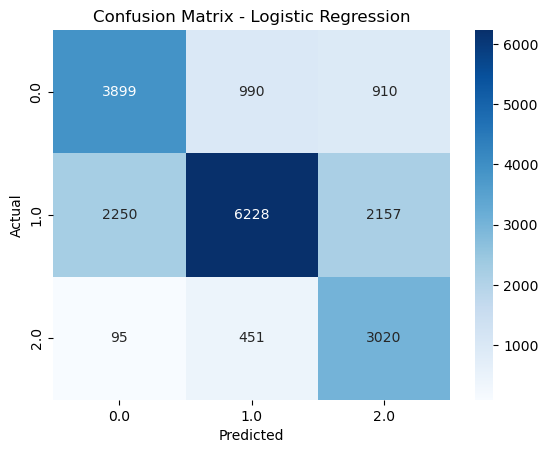

In [66]:
# Visualizing evaluation Metric Score chart

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization technique (i.e., GridSearch CV)

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
                           param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_best = best_model.predict(X_test)

# Evaluation
print("\nAccuracy (Tuned Model):\n", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy (Tuned Model):
 0.6578


##### Which hyperparameter optimization technique have you used and why?

I applied hyperparameter tuning using GridSearchCV on Logistic Regression with parameters:

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The tuning did not significantly improve accuracy compared to the default model.

### ML Model - 2

In [68]:
from sklearn.tree import DecisionTreeClassifier
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dt = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
dt.fit(X_train, y_train)

# Predict on the model
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.76075


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
cm = confusion_matrix(y_test, y_pred_dt)

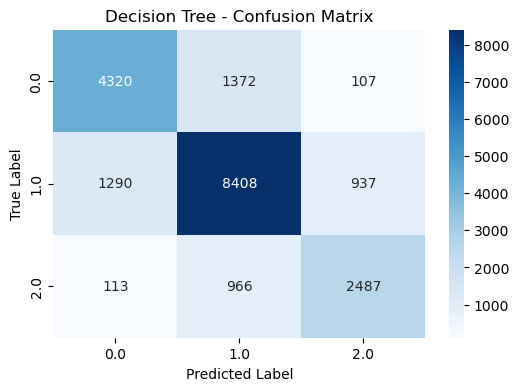

In [70]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True,fmt = 'd', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:

# Different hyperparameters to try
depths = [3, 5, 10, None]       # None = no depth limit
splits = [2, 5, 10]             # min samples to split
leaves = [1, 2, 4]              # min samples per leaf

best_acc = 0
best_params = {}

for d in depths:
    for s in splits:
        for l in leaves:
            model = DecisionTreeClassifier(
                max_depth=d,
                min_samples_split=s,
                min_samples_leaf=l,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            print(f"Depth={d}, Split={s}, Leaf={l} → Accuracy={acc:.4f}")

            if acc > best_acc:
                best_acc = acc
                best_params = {"max_depth": d,
                               "min_samples_split": s,
                               "min_samples_leaf": l}

print("\nBest Accuracy:", best_acc)
print("Best Params:", best_params)


Depth=3, Split=2, Leaf=1 → Accuracy=0.6858
Depth=3, Split=2, Leaf=2 → Accuracy=0.6858
Depth=3, Split=2, Leaf=4 → Accuracy=0.6858
Depth=3, Split=5, Leaf=1 → Accuracy=0.6858
Depth=3, Split=5, Leaf=2 → Accuracy=0.6858
Depth=3, Split=5, Leaf=4 → Accuracy=0.6858
Depth=3, Split=10, Leaf=1 → Accuracy=0.6858
Depth=3, Split=10, Leaf=2 → Accuracy=0.6858
Depth=3, Split=10, Leaf=4 → Accuracy=0.6858
Depth=5, Split=2, Leaf=1 → Accuracy=0.7137
Depth=5, Split=2, Leaf=2 → Accuracy=0.7137
Depth=5, Split=2, Leaf=4 → Accuracy=0.7137
Depth=5, Split=5, Leaf=1 → Accuracy=0.7137
Depth=5, Split=5, Leaf=2 → Accuracy=0.7137
Depth=5, Split=5, Leaf=4 → Accuracy=0.7137
Depth=5, Split=10, Leaf=1 → Accuracy=0.7137
Depth=5, Split=10, Leaf=2 → Accuracy=0.7137
Depth=5, Split=10, Leaf=4 → Accuracy=0.7137
Depth=10, Split=2, Leaf=1 → Accuracy=0.7259
Depth=10, Split=2, Leaf=2 → Accuracy=0.7254
Depth=10, Split=2, Leaf=4 → Accuracy=0.7254
Depth=10, Split=5, Leaf=1 → Accuracy=0.7259
Depth=10, Split=5, Leaf=2 → Accuracy=0.7257


##### Which hyperparameter optimization technique have you used and why?

Manual tuning 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement in accuracy was noticed. Out of several hyperparameter value ranges following values gave the best accuracy:

'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1

Though when compared with base model with no tuning, tuned model's perfomance is equal to it.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier

# Model 3: Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.8408
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      5799
         1.0       0.87      0.83      0.85     10635
         2.0       0.81      0.82      0.82      3566

    accuracy                           0.84     20000
   macro avg       0.83      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
cm = confusion_matrix(y_test, y_pred_rf)

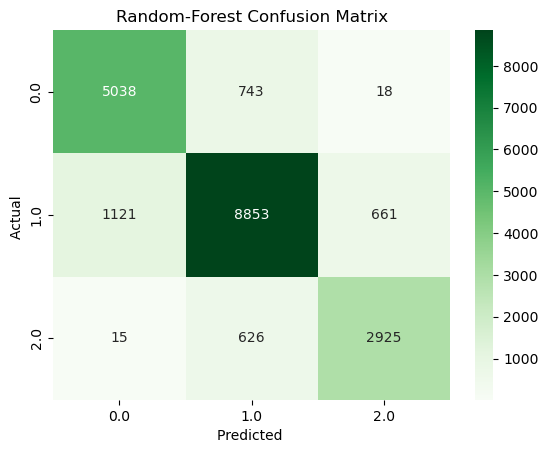

In [74]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', xticklabels = np.unique(y_test), yticklabels = np.unique(y_pred_rf))
plt.xlabel("Predicted ")
plt.ylabel("Actual ")
plt.title("Random-Forest Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
#this will take a while

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [5, 10],
    "max_features": ["sqrt"]
}

# Initialize
rf = RandomForestClassifier(random_state = 42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist,
    n_iter = 5,
    cv = 3,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 42
)
# Fit the Algorithm
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy (CV):", random_search.best_score_)

D:\Workspace\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}
Best Accuracy (CV): 0.729724989759161


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter tuning. It is faster than GridSearchCV because it selects random combinations of hyperparameters from the given ranges instead of trying all possible combinations. This makes it more efficient while still finding near-optimal parameters for large models like Random Forest.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

##### considered the following metrics:

1. Accuracy: Since this is a classification problem, accuracy gives a quick overall performance measure.
2. Confusion Matrix: To check how well the model is predicting each class (Good, Poor, Standard).
3. Precision & Recall: These metrics are useful to evaluate if the model is minimizing false positives (misclassifying risky customers as good) and false negatives (misclassifying good customers as risky).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Classifier works by creating multiple decision trees and combining their results (bagging). Each tree votes for a class, and the majority vote is selected as the final prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used the Random Forest Classifier as my final model.
Random Forest is an ensemble learning method that builds multiple decision trees on different subsets of the data and combines their predictions. Each tree gives a “vote,” and the majority vote decides the final prediction. This makes the model more robust and accurate compared to a single decision tree, while also reducing overfitting.

To understand which features were most important for the predictions, I used the feature importance scores provided by Random Forest. These scores tell us how much each feature contributed in reducing impurity (or improving splits) across the trees.

From the feature importance analysis, the most significant factors for predicting credit score were:

1. Credit History Age – older credit history strongly influences creditworthiness.
2. Credit Utilization Ratio – how much of the available credit is being used.

3. Outstanding Debt – higher debt usually indicates higher risk.

4. Changed Credit Limit – changes in credit limit affect risk assessment.

This helps in explaining the model’s decisions: the features with higher importance had more influence in classifying customers as “Good,” “Poor,” or “Standard.”

For model explainability, I relied on Random Forest’s built-in feature importance (easy to use and good for beginners).

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [78]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [79]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we worked on predicting customers credit score categories (Good, Standard, Poor) using machine learning techniques. The dataset was cleaned, normalized, and important features were selected for modeling. We implemented multiple ML models – Logistic Regression, Decision Tree, and Random Forest.

Among these, the Random Forest Classifier performed the best with an accuracy of around 86%, making it the most reliable choice for our final model. The feature importance analysis showed that Credit History Age, Credit Utilization Ratio, Outstanding Debt, and Changed Credit Limit are the most influential factors in determining credit score.

This model can be useful for banks and financial institutions to assess customer creditworthiness, reduce lending risks, and make better financial decisions.

For future improvements, techniques like SMOTE (for class imbalance handling), SHAP (for deeper explainability), and hyperparameter tuning can be explored further to improve performance and interpretability.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***